<a href="https://colab.research.google.com/github/Anas182000/BIKE-SHARING-DEMAND-PREDICTION/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [3]:
#IMPORTING THE DRIVE

from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/DATA OF BKE PREDICTION PROJECT/SeoulBikeData.csv"
df_bike=pd.read_csv(path,encoding="unicode_escape")

In [5]:
#SHAPE OF THE DATASET
df_bike.shape

(8760, 14)

In [6]:
df_bike.info()  #TYPES OF COLOUMN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df_bike.head() 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
df_bike.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
df_bike.columns   #COLOUMN NAME

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
df_bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
df_bike.isnull().sum()  #CHECKING THE NULL VALUES

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [12]:
#RENAMING THE COLOUMNS BCZ OF THE UNITS ASSOCIATED WITH THE COLOUMNS WHICH MIGHT CREATE A PROBLEM IN FURTHER PROCESS
df_bike=df_bike.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [13]:
df_copy = df_bike.copy(deep=True)  #CREATING A COPY OF DATASET


In [14]:
#CHANGING DATE COLOUMN FROM OBJECT TO DATE_TIME
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [15]:
#CREATING NEW COLOUMN OF YEAR,MONTH & DAY
df_copy['year'] = df_copy['Date'].dt.year
df_copy["month"]=df_copy["Date"].dt.month
df_copy["day"]=df_copy["Date"].dt.day_name()


In [16]:
df_copy.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday


In [17]:
#CHECKING FOR THE WEEKDAY AND WEEKEND DAYS
df_copy['weekdays_weekend']=df_copy['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df_copy=df_copy.drop(columns=['Date','day','year'],axis=1)

In [18]:
df_copy.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


# **EDA( EXPLORATORY DATA ANALYSIS)**

---



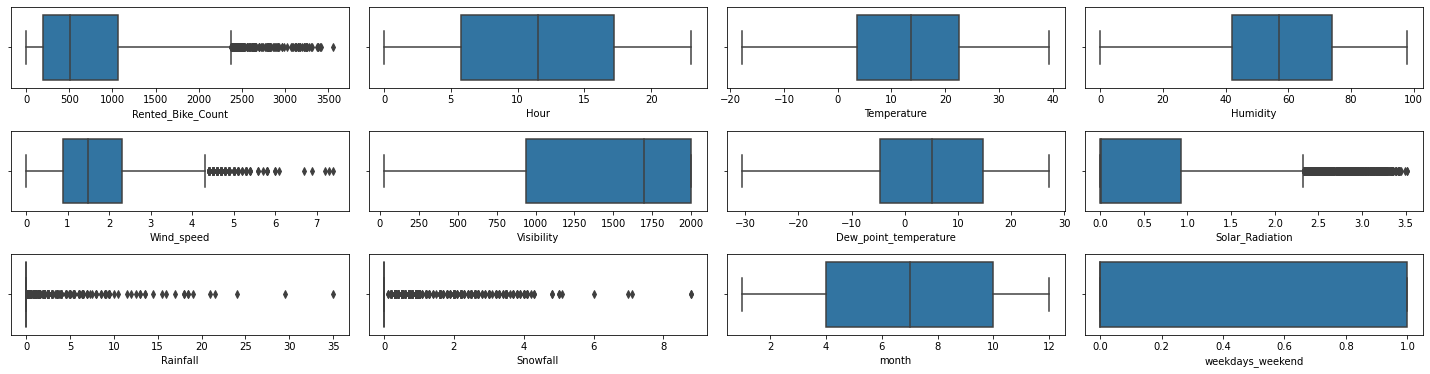

In [19]:
#CHECKING FOR OUTLIERS
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df_copy.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df_copy[col])
    num_it+=1
    
plt.tight_layout()

CONCLUSION : Rented Bike count,Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outliers but for our analysis Rented Bike count is vital.

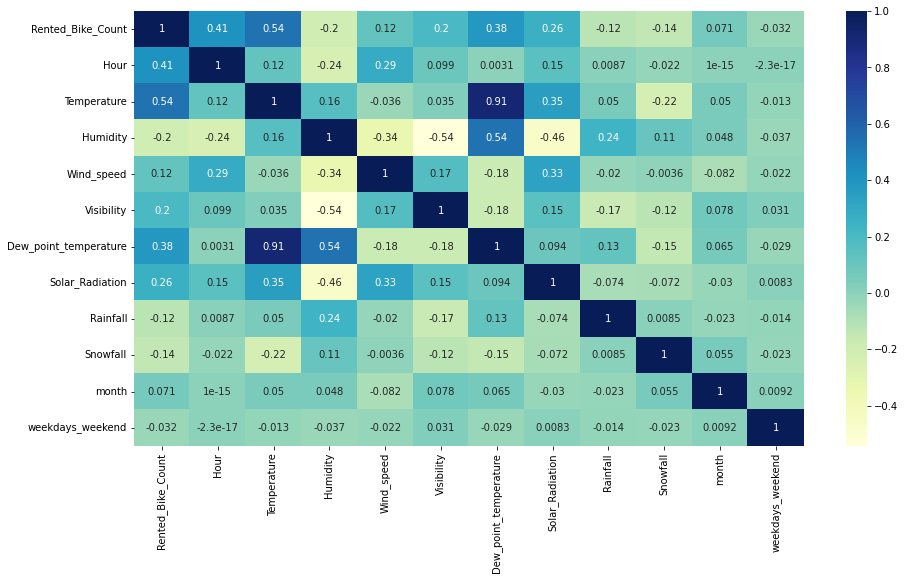

In [20]:
#CORRELATION THROUGH HEAT MAP
plt.figure(figsize=(15,8))
sns.heatmap(df_copy.corr(),annot=True,cmap="YlGnBu")

plt.show()

Some insights:-

1)Day Hour is highly correlated to Number of bike rented, as the hour increase number of bikes rented alos increase.

2)Temperature, dew point and Bike rented count are highly correlated, as temperature and dewpoint increases , bike rented count increase

3)Temperature and solar radiation are correlated.

4)Wind speed and hour are correlated, as hours increase ina day wind speed also goes up.

5)Temperature and dew point are extremely correlated.

6)Visibility, solar radiationand Humidity are negatively correlated, as humidity increases, solar radiation and visibility decreases.

7)Wind speed, solar radiation and visibility are positively correlated.

8)Humidity and rainfall are positively correlated, more the rainfall more is the humidity and more the dew point


We can say that bike rented count is positively correlated to these top 6 features in Decending order.

-->Temperature..........................- (0.54)

-->Hour........................................- (0.41)

-->Dew Point Temperature.........- (0.38)

-->Solar Radiation.......................- (0.26)

-->Visibility...................................- (0.20)

-->Win speed................................- (0.12)

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

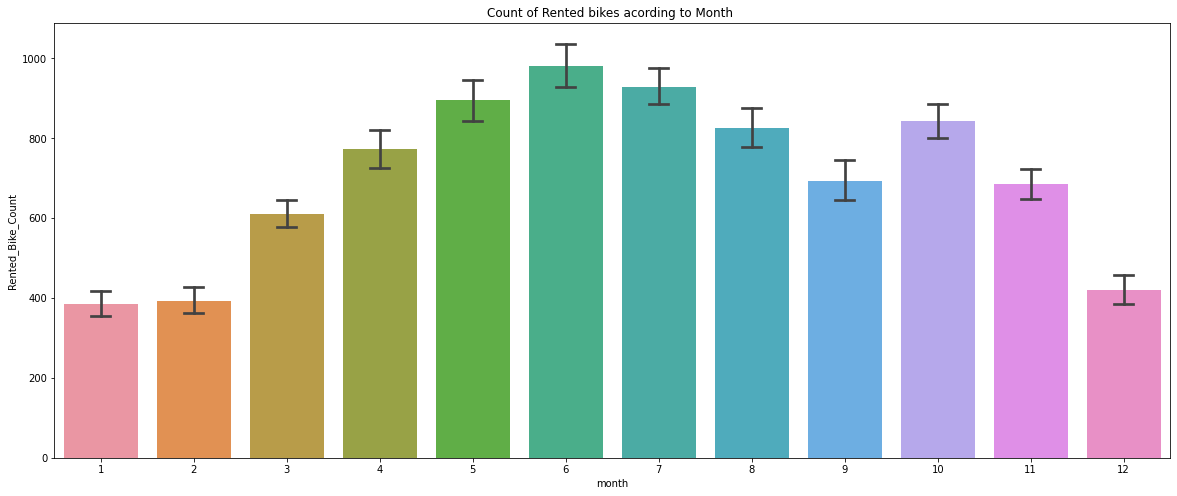

In [21]:
#MONTH WISE ANALYSIS 
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df_copy,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

In [22]:
df_copy["weekdays_weekend"].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

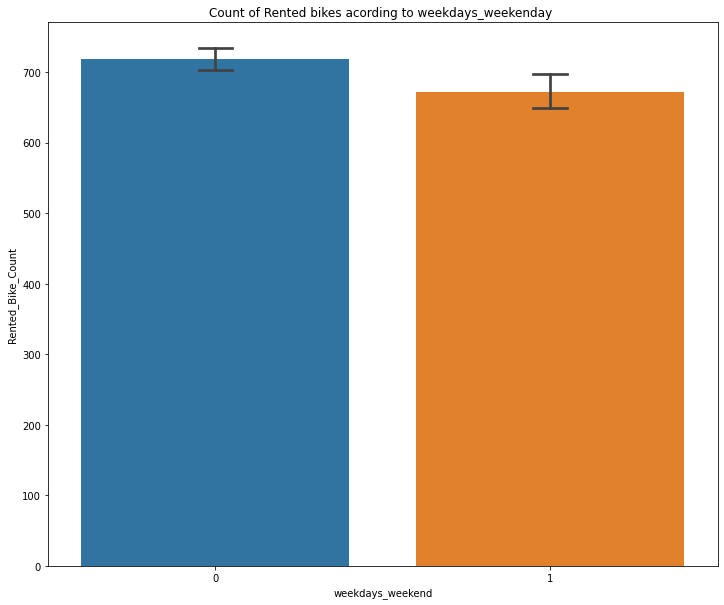

In [23]:
#WEEKDAYS VS WEEKEND
fig,ax=plt.subplots(figsize=(12,10))
sns.barplot(data=df_copy,x="weekdays_weekend",y="Rented_Bike_Count",ax=ax,capsize=.1 )
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')


CONCLUSION: Mostly Bike were rented in weekdays as compared to weekend


In [24]:
df_copy["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

[Text(0.5, 1.0, 'Most prefable seasons for bike renting')]

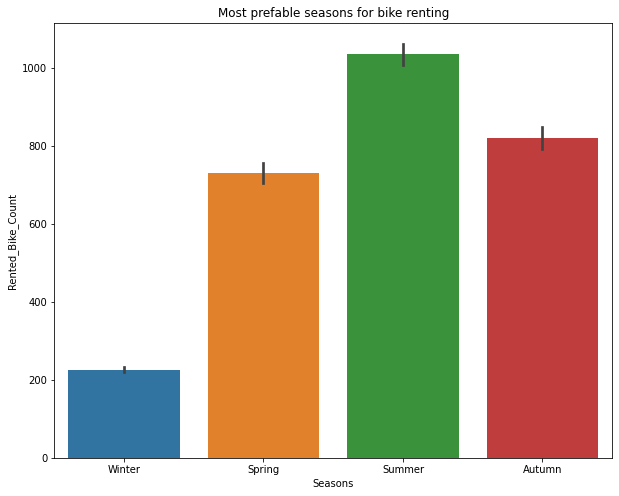

In [25]:
#SEASONS WISE BIKE RENTING 
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_copy,x="Seasons",y="Rented_Bike_Count",ax=ax)
ax.set(title="Most prefable seasons for bike renting")

CONCLUSION : The most Bike rented in the season of summer 

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

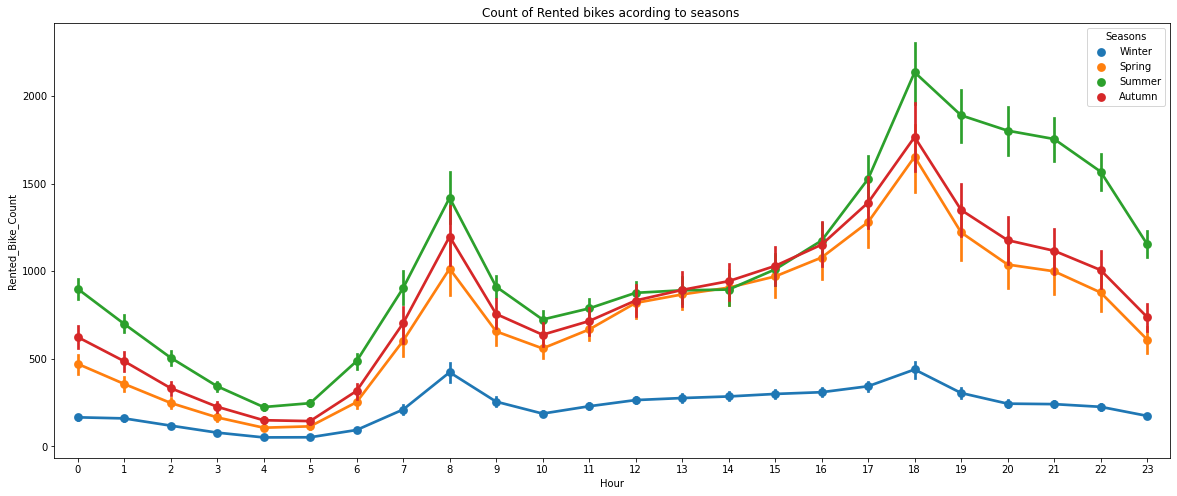

In [26]:
#IN WHICH SEASONS IN WHICH HOUR MOST BIKE RENTED
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df_copy,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')


CONCLUSION : 1)In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.

2)In winter season the use of rented bike is very low because of snowfall.*

[Text(0.5, 1.0, 'Busisest hour for bike renting')]

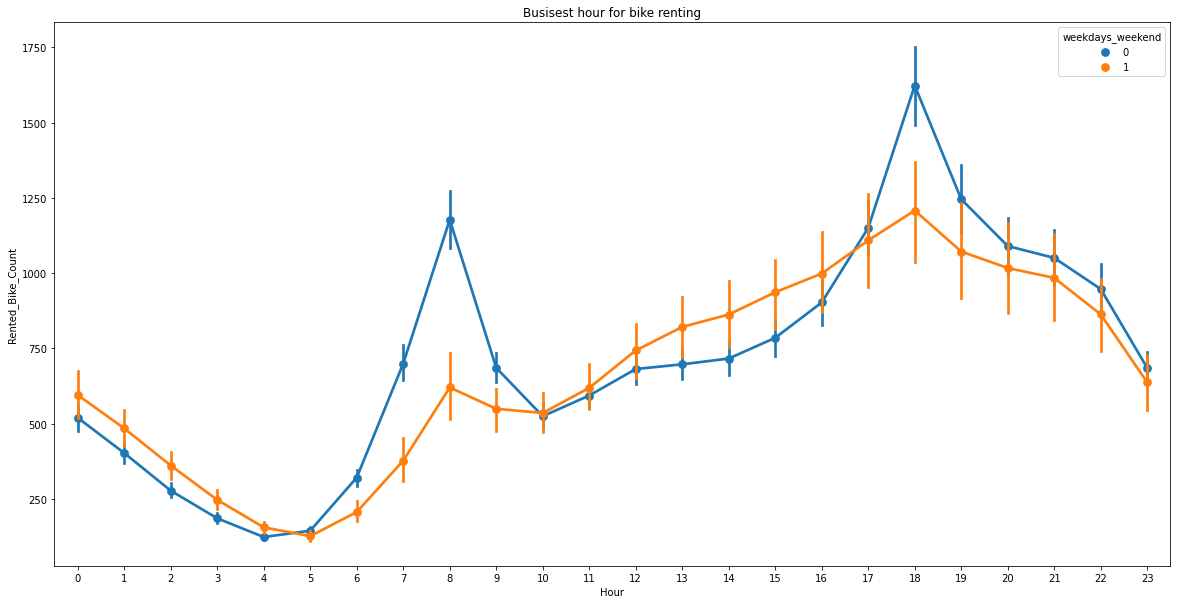

In [27]:
#IN WHICH HOUR THE MAXIMUM BIKE RENTED ON WEEKEND AND WEEKDAYS
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df_copy,x="Hour",y="Rented_Bike_Count",hue="weekdays_weekend",ax=ax)
ax.set(title="Busisest hour for bike renting")



CONCLUSION : The maximum bike rented during the morning time is around 8:00 clock because it is majorly a office time and during evening time it is around 6:00 clock when office time ends.


[Text(0.5, 1.0, ' holiday and rented')]

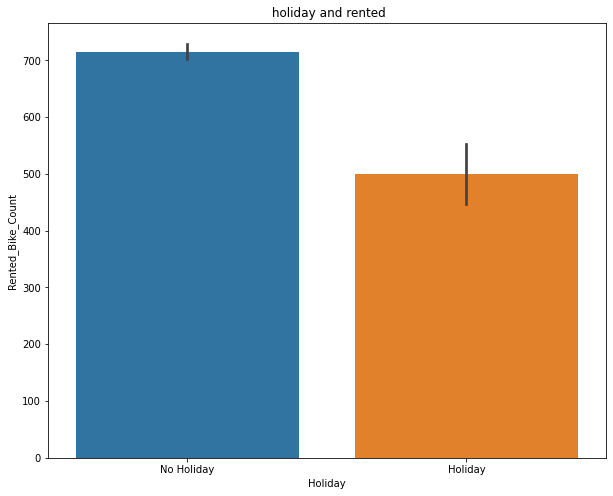

In [28]:
#RELATION BETWEEN HOLIDAY AND NON HOLIDAY
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_copy,x="Holiday",y="Rented_Bike_Count",ax=ax)
ax.set(title=" holiday and rented")


In [29]:
df_copy["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

Text(0.5, 1.0, 'Bike Rent Count Holiday vs Non Holiday %')

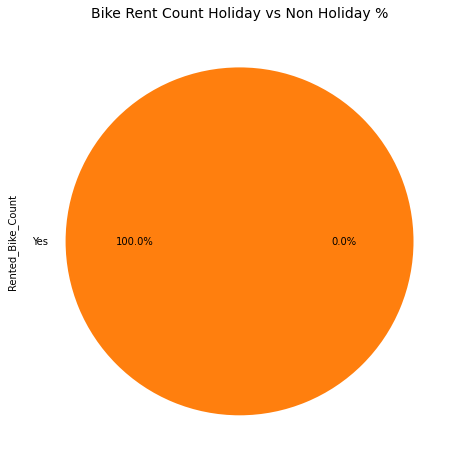

In [30]:
#BIKE RENTED ON FUNCTIONING DAY(THROUGH PIE CHART)
hdf=df_copy.groupby("Functioning_Day").sum()
hdf['Rented_Bike_Count'].plot(kind='pie',autopct='%1.1f%%',figsize=(15,8))
plt.title('Bike Rent Count Holiday vs Non Holiday %',fontsize=14)

[Text(0.5, 1.0, ' rented bike relation with Functionng Day')]

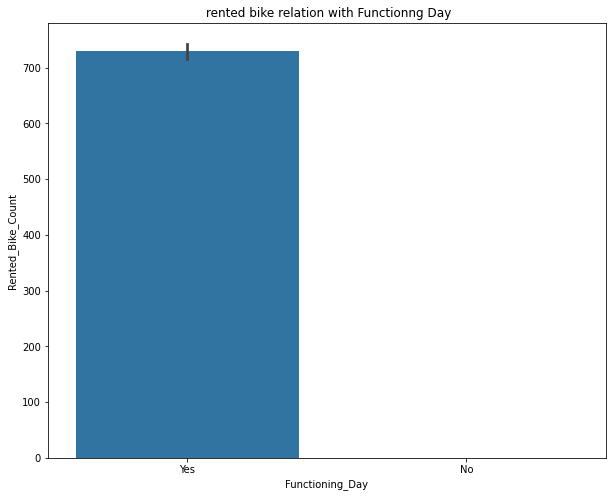

In [31]:
#BIKE RENTED ON FUNCTIONING DAY
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_copy,x="Functioning_Day" , y="Rented_Bike_Count",ax=ax)
ax.set(title=" rented bike relation with Functionng Day")

CONCLUSION : 100% of bikes are rented on the functioning Day

**CHANGING DATA TYPE**

In [32]:
#CHANGING THE INT64 COLUMN TO OBJECT TYPE
numeric_cols=['Hour','month','weekdays_weekend']
for i in  numeric_cols:
  df_copy[i]=df_copy[i].astype('category')

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

**NUMERICAL VARIABLE**

In [34]:
#ASSIGNING THE NUMERICAL COLOUMN TO VARIABLE
numerical_columns=list(df_copy.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

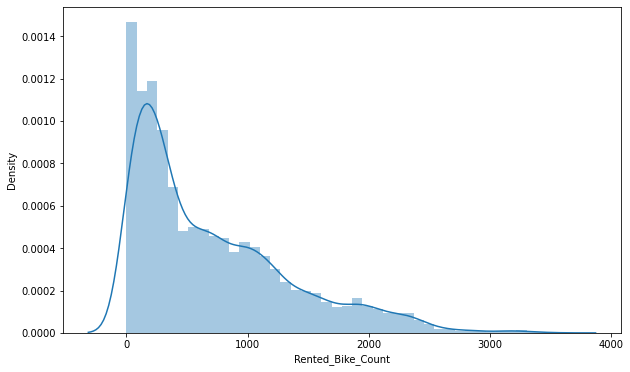

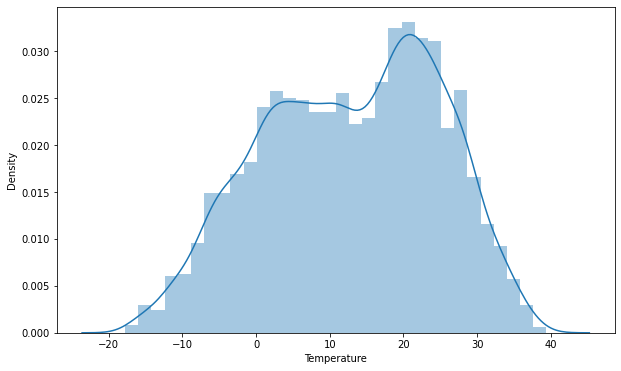

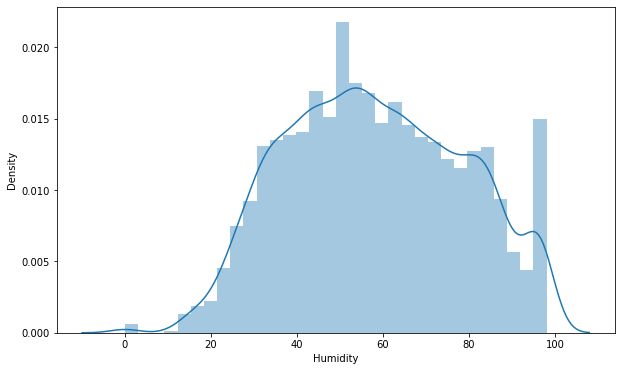

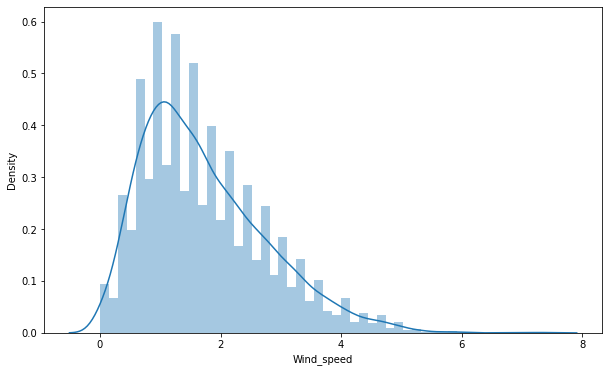

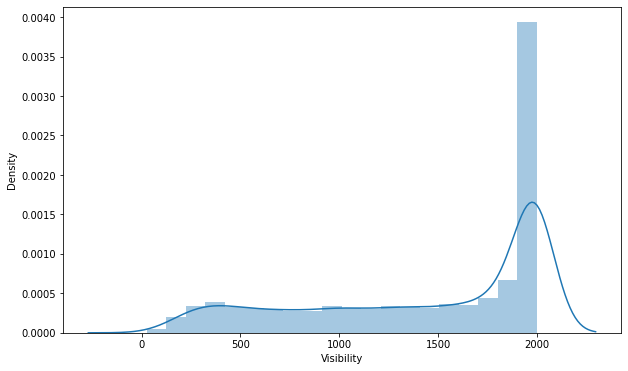

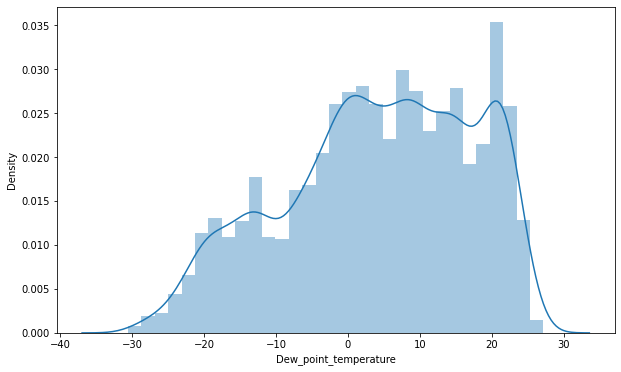

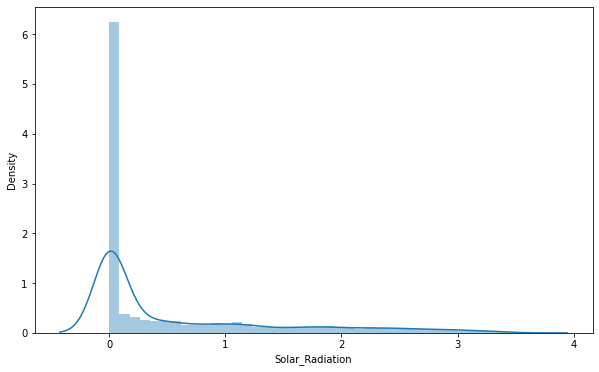

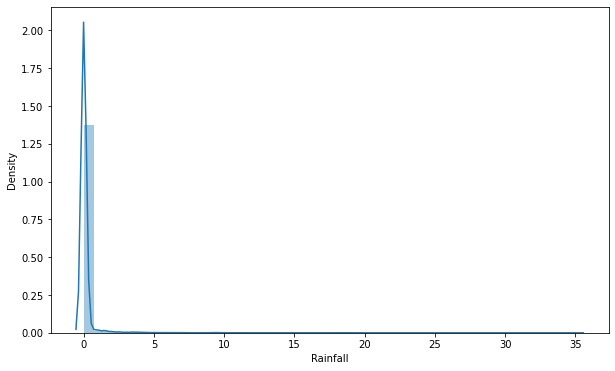

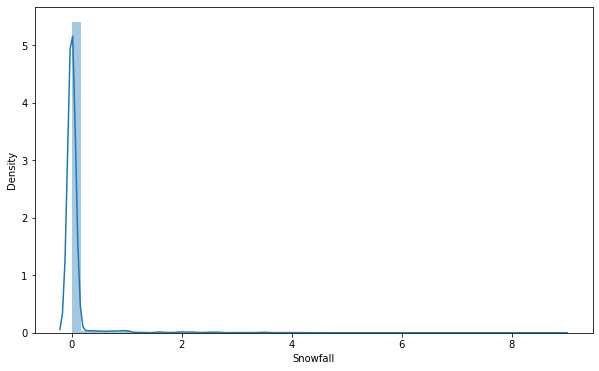

In [35]:
#DISTRIBUTION OF ALL NUMERICAL FEATURE THROUGH DISPLOT
for i in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df_copy[i])
  plt.xlabel(i)
plt.show()

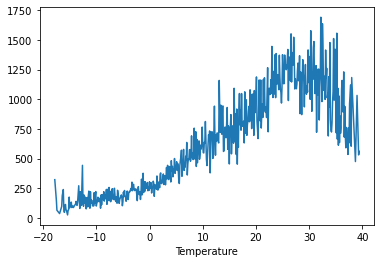

In [36]:
#relationship between "Rented_Bike_Count" and "Temperature" 
df_copy.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

CONCLUSION : People tends to ride bike more when it's a  hot weather more than 25°C.

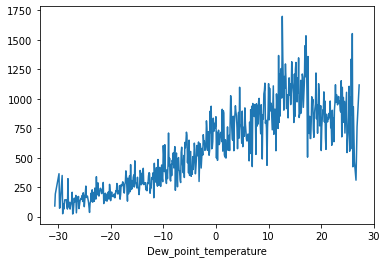

In [37]:
#relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
df_copy.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

CONCLUSION : Dew point temperature and temperature plots have similarity with rented bike counts

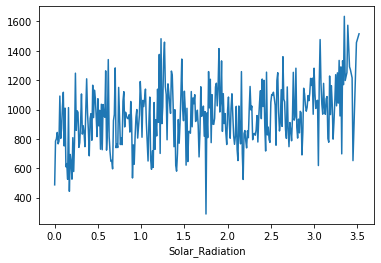

In [38]:
#Relation between "Rented_Bike_Count" and "Solar_Radiation" 
df_copy.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

CONCLUSION : Solar radiation And Rented Bike Count having direct relation more the solar radiation the bike renting is more on an mean 1000 bikes were rented.

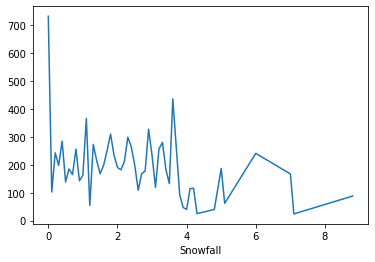

In [39]:
#Relationship between "Rented_Bike_Count" and "Snowfall"
df_copy.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

CONCLUSION : The Bike renting is less when The Snowfall is more.

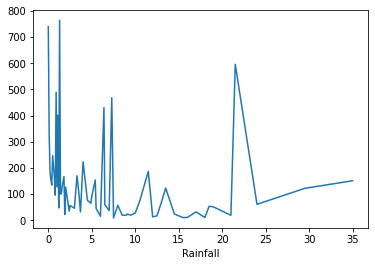

In [40]:
#Relationship between "Rented_Bike_Count" and "Rainfall" 
df_copy.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

CONCLUSION : As the rainfall increases the Bike Renting Decreases. 

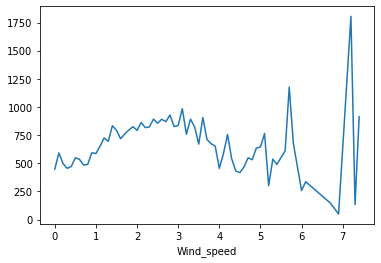

In [41]:
#Relationship between "Rented_Bike_Count" and "Wind_speed" 
df_copy.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

CONCLUSION : We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.

# REGRESSION PLOT

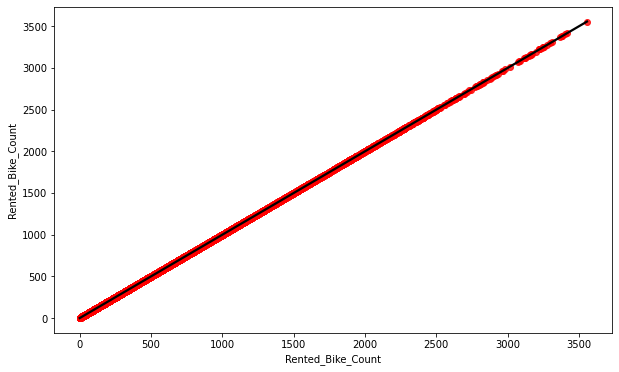

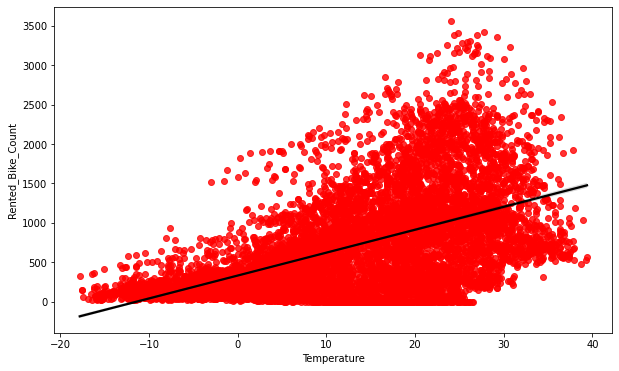

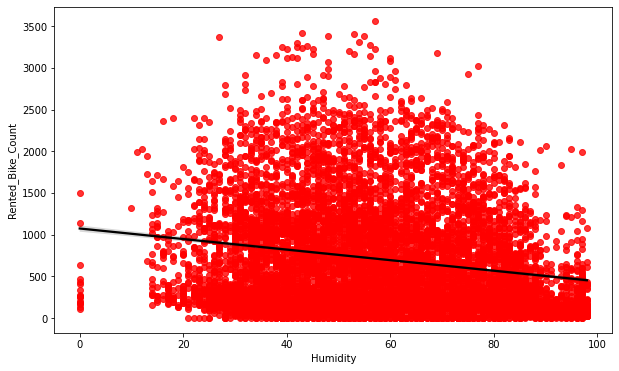

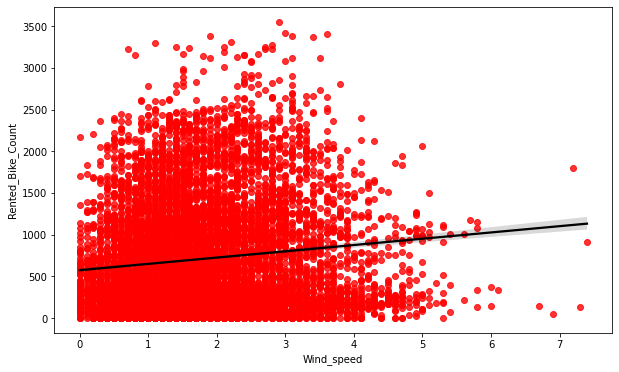

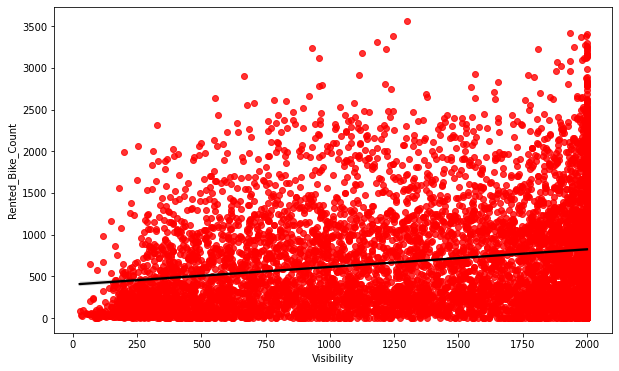

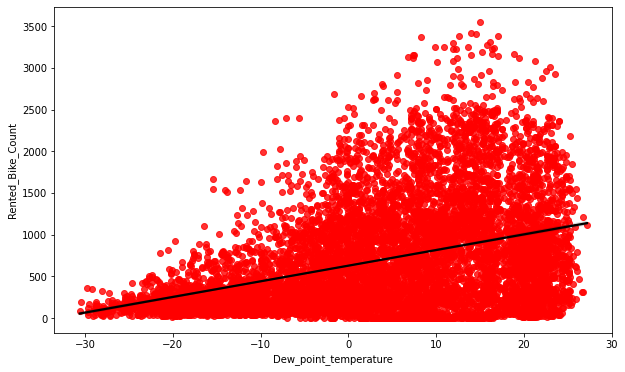

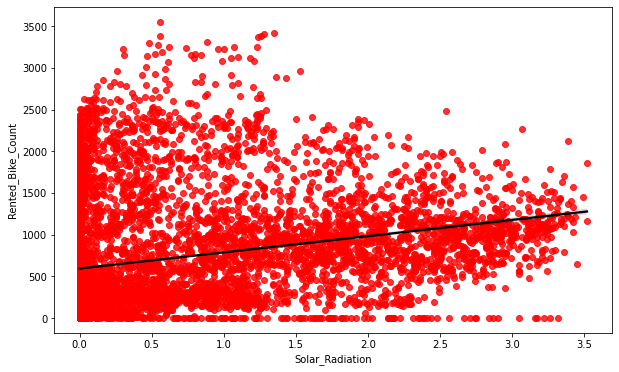

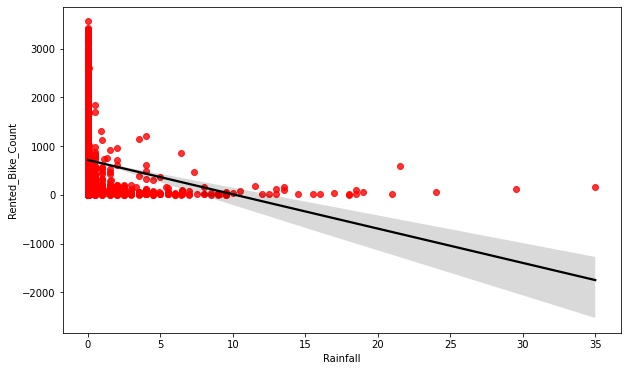

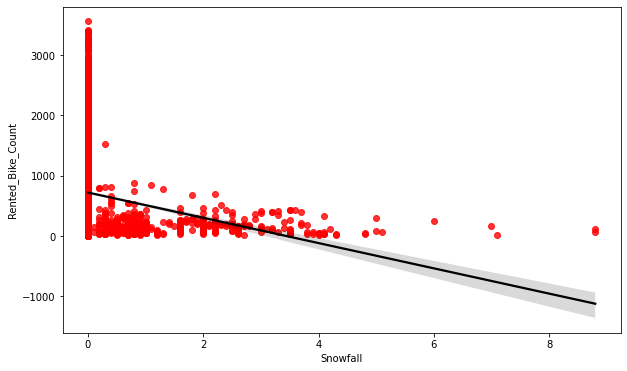

In [42]:
#Printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df_copy[col],y=df_copy['Rented_Bike_Count'],scatter_kws={"color": 'red'}, line_kws={"color": "black"})

CONCLUSION:

 1)From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.

2)'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

# **Normalise Rented_Bike_Count column data(DATA PRE PROCESSING)**

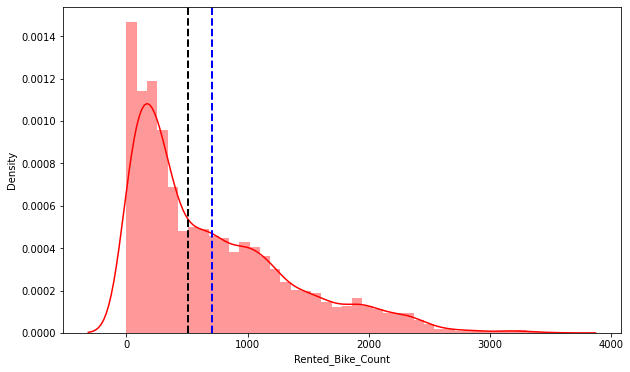

In [43]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df_copy['Rented_Bike_Count'],hist=True ,color="r")
ax.axvline(df_copy['Rented_Bike_Count'].mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(df_copy['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

CONCLUSION:

The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.*

# OUTLIERS

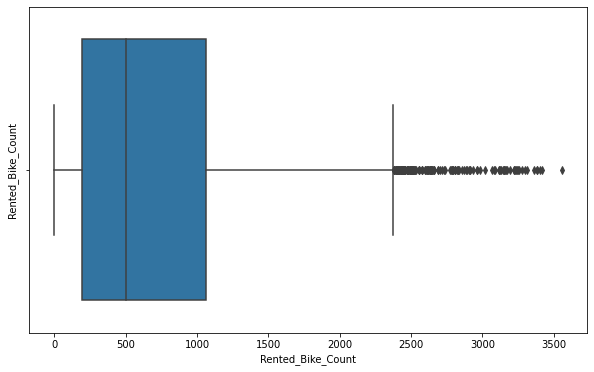

In [44]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df_copy['Rented_Bike_Count'])
plt.show()

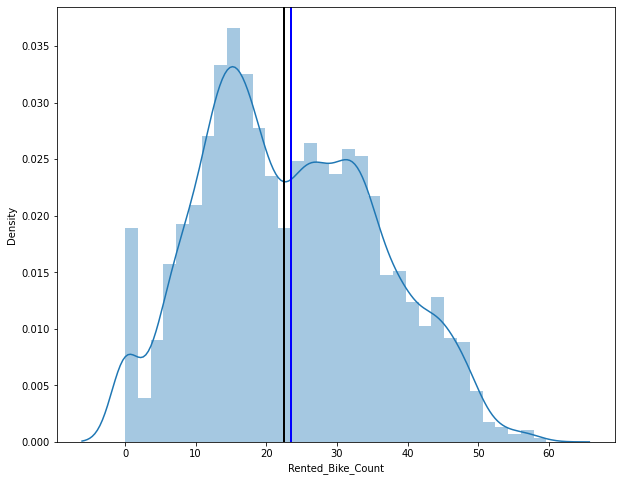

In [45]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df_copy['Rented_Bike_Count']))
ax.axvline(np.sqrt(df_copy['Rented_Bike_Count']).mean(), color='blue', linestyle='solid', linewidth=2)
ax.axvline(np.sqrt(df_copy['Rented_Bike_Count']).median(), color='black', linestyle='solid', linewidth=2)

plt.show()

CONCLUSION:

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

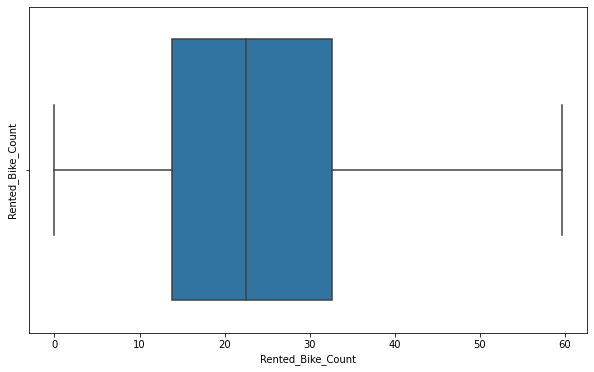

In [46]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers?
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df_copy['Rented_Bike_Count']))
plt.show()

CONCLUSION:

After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

# Correlation between variables

OLS Model

In [47]:
##########
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = df_copy[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y =df_copy['Rented_Bike_Count']
df_copy.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [48]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [49]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

CONCLUSION OF OLS MODEL:

1)R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is explained by the model.

2)For F statistic , P value is less than 0.05 for 5% levelof significance.

3)P value of dew point temp and visibility are very high and they are not significant.

4)Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.

5)The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems

6)Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.

In [50]:
X.corr()



,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


CONCLUSION: 

From the OLS we found that "dew_temperature_point" and "Temperature" are highly correlated so we drop the "dew_temperature_pont" coloumn by checking the value (P>|t|) 

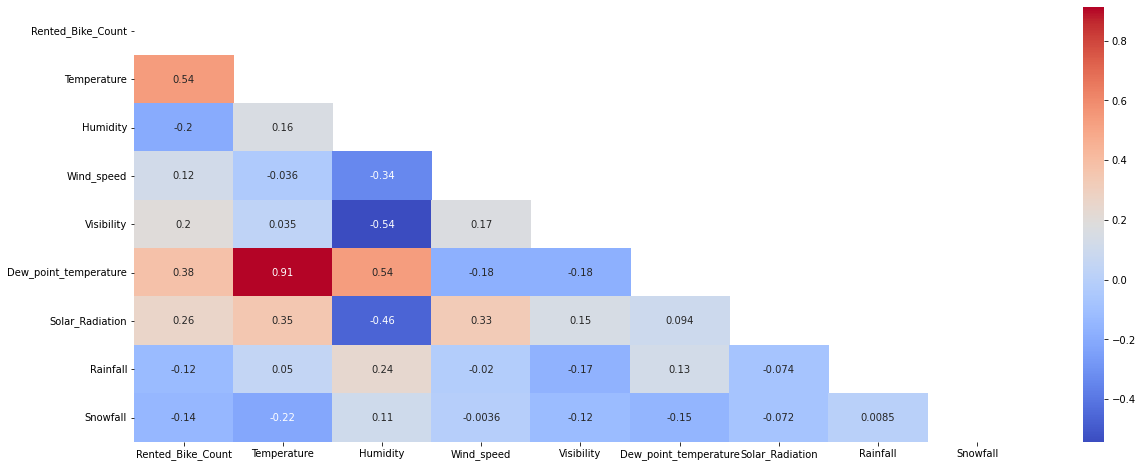

In [51]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df_copy.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

In [52]:
#drop the Dew point temperature column
df_copy=df_copy.drop(['Dew_point_temperature'],axis=1)

# Create the dummy variables

In [53]:
#Assign all categorical features to a variable
categorical_features=list(df_copy.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# ONE HOT ENCODING

In [54]:
#create a copy


def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()       

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MODEL TRAINING

In [55]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
Y = np.sqrt(df_copy['Rented_Bike_Count'])

In [56]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [58]:
#Create test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)


(6570, 47)
(2190, 47)


# LINEAR REGRESSION


In [59]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, Y_train)

In [60]:
#check the score
reg.score(X_train, Y_train)

0.7557884266778845

In [61]:
#check the coefficeint
reg.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [62]:
#get the X_train and X-test value
Y_predicted_train=reg.predict(X_train)
Y_predicted_test=reg.predict(X_test)


In [63]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((Y_train), (Y_predicted_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(Y_train, Y_predicted_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(Y_train, Y_predicted_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(Y_train, Y_predicted_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 37.60630594639787
RMSE : 6.132398058377968
MAE : 4.658244745512172
R2 : 0.7557884266778845
Adjusted R2 : 0.7504299094294534


Looks like our r2 score value is 0.75 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [64]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [65]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(Y_test, Y_predicted_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(Y_test, Y_predicted_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((Y_test), (Y_predicted_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((Y_test), (Y_predicted_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 36.64474647323363
RMSE : 6.053490437196843
MAE : 4.658361507344821
R2 : 0.7680218977120631
Adjusted R2 : 0.762931808632916


The r2_score for the test set is 0.76. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [66]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

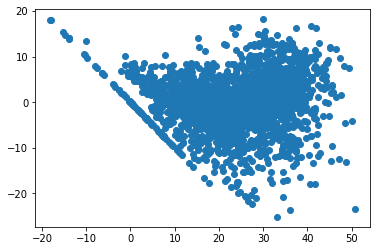

In [67]:
### Heteroscadacity
plt.scatter((Y_predicted_test),(Y_test)-(Y_predicted_test))

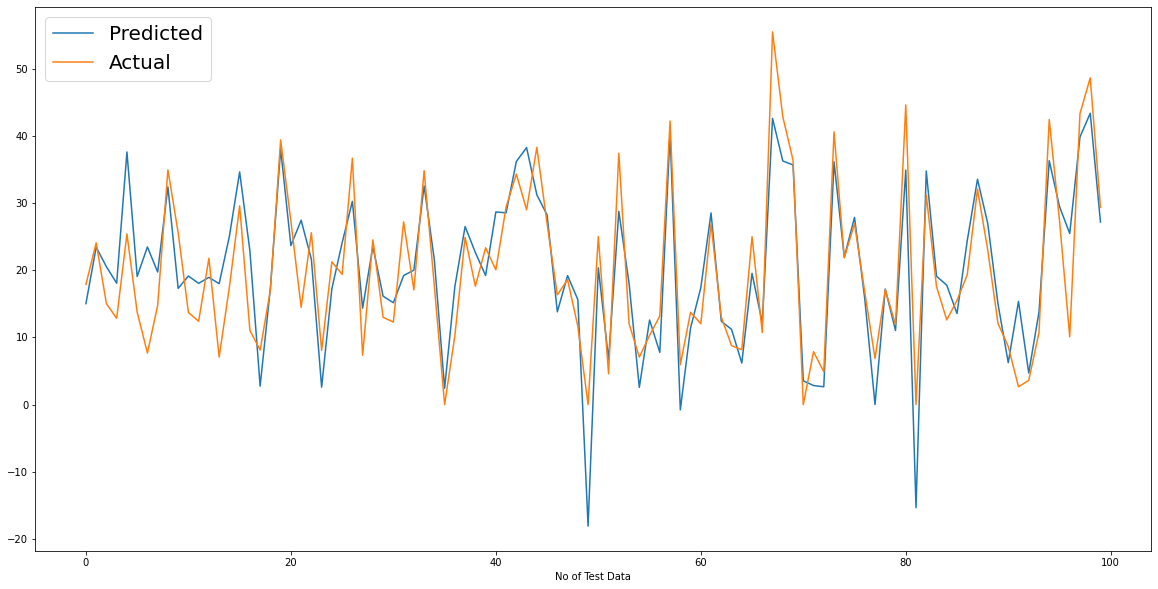

In [68]:
#Plot the figure
plt.figure(figsize=(20,10))
plt.plot(Y_predicted_test[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"],prop={"size":20})
plt.xlabel('No of Test Data')
plt.show()




# **LASSO REGRESSION**

In [69]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, Y_train)
# Create the model score
print(lasso.score(X_test, Y_test), lasso.score(X_train, Y_train))

0.3873692800799008 0.40519624904934015


In [70]:
#get the X_train and X-test value
Y_pred_train_lasso=lasso.predict(X_train)
Y_pred_test_lasso=lasso.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((Y_train), (Y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(Y_train, Y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(Y_train, Y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(Y_train, Y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


Looks like our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [72]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)


In [73]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(Y_test, Y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(Y_test, Y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((Y_test), (Y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((Y_test), (Y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (Y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


The r2_score for the test set is 0.38. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [74]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

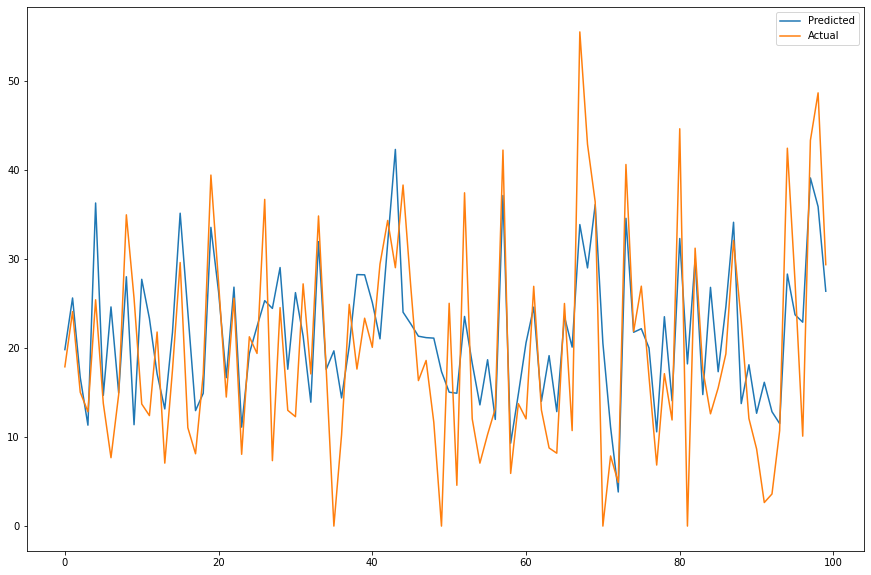

In [75]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_pred_test_lasso[:100]))
plt.plot(np.array((Y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

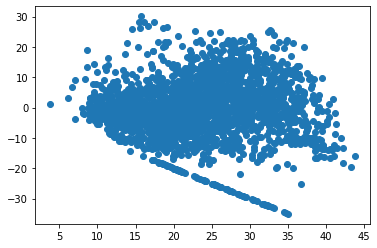

In [76]:
### Heteroscadacity
plt.scatter((Y_pred_test_lasso),(Y_test-Y_pred_test_lasso))


# RIDGE REGRESSION


In [77]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [78]:
#FIT THE MODEL
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [79]:
#check the score
ridge.score(X_train, Y_train)

0.7557883433655243

In [80]:
#get the X_train and X-test value
Y_pred_train_ridge=ridge.predict(X_train)
Y_pred_test_ridge=ridge.predict(X_test)

In [81]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((Y_train), (Y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(Y_train, Y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(Y_train, Y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(Y_train, Y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 37.60631877572478
RMSE : 6.13239910440643
MAE : 4.658340946942368
R2 : 0.7557883433655243
Adjusted R2 : 0.7504298242890441


Looks like our r2 score value is 0.75 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [82]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [83]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(Y_test, Y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(Y_test, Y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((Y_test), (Y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((Y_test), (Y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (Y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 36.646577616668694
RMSE : 6.053641682216473
MAE : 4.658618929538894
R2 : 0.7680103057317668
Adjusted R2 : 0.7629199623001108


The r2_score for the test set is 0.76. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [84]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

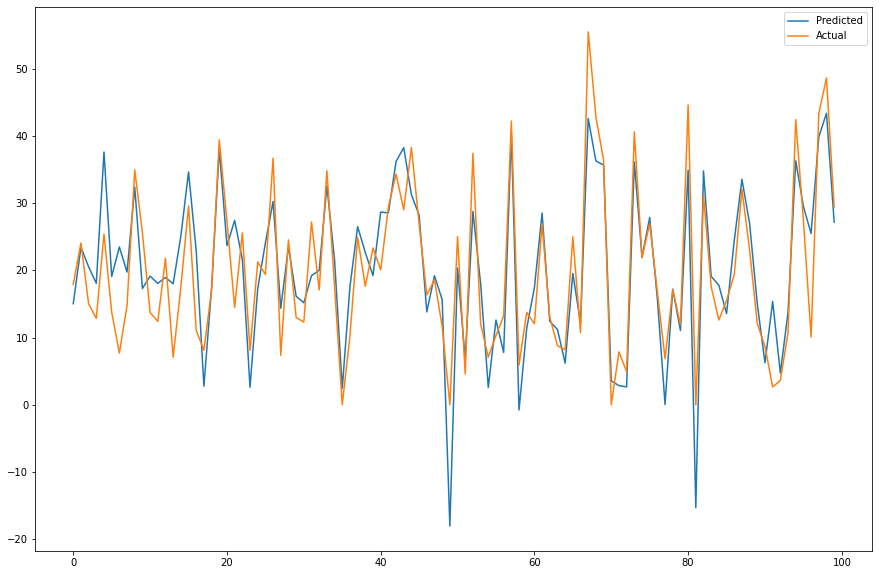

In [85]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((Y_pred_test_ridge[:100]))
plt.plot((np.array(Y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

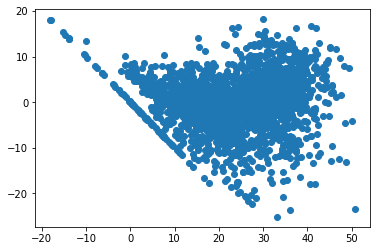

In [86]:
### Heteroscadacity
plt.scatter((Y_pred_test_ridge),(Y_test)-(Y_pred_test_ridge))

# ELASTIC NET REGRESSION

In [87]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [88]:
#FIT THE MODEL
elasticnet.fit(X_train,Y_train)


ElasticNet(alpha=0.1)

In [89]:
#check the score
elasticnet.score(X_train, Y_train)

0.6152557713637432

In [90]:
#get the X_train and X-test value
Y_pred_train_en=elasticnet.predict(X_train)
Y_pred_test_en=elasticnet.predict(X_test)

In [91]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((Y_train), (Y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(Y_train, Y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(Y_train, Y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(Y_train, Y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(Y_train, Y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.247024931621645
RMSE : 7.69720890528649
MAE : 5.891715220293744
R2 : 0.6152557713637432
Adjusted R2 : 0.6068136711088861


Looks like our r2 score value is 0.61 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [92]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [93]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(Y_test, Y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(Y_test, Y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((Y_test), (Y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((Y_test), (Y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((Y_test), (Y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 61.65141449800951
RMSE : 7.851841471782878
MAE : 6.0107752888670705
R2 : 0.6097181856869531
Adjusted R2 : 0.601154579117059


The r2_score for the test set is 0.60. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [94]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

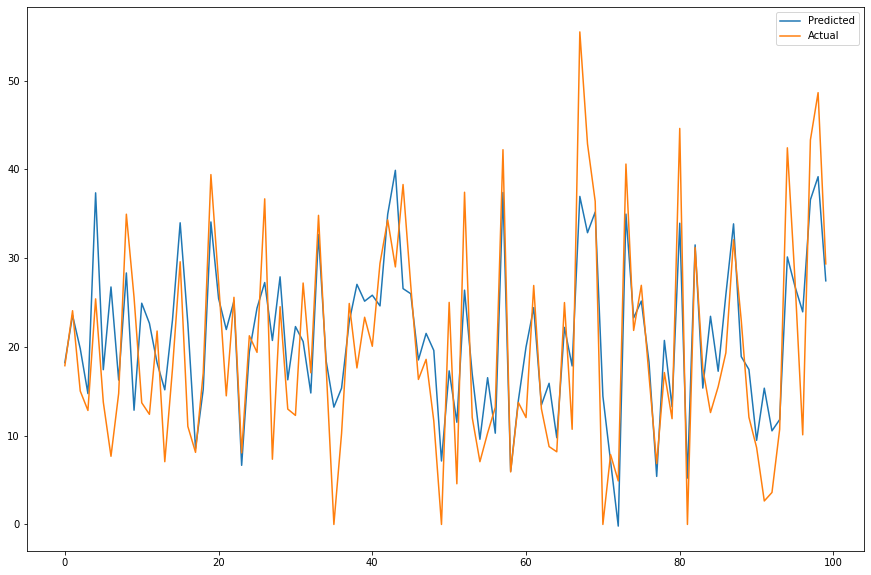

In [95]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_pred_test_en[:100]))
plt.plot((np.array(Y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

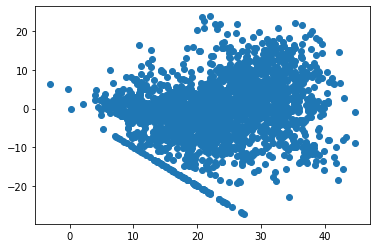

In [96]:
### Heteroscadacity
plt.scatter((Y_pred_test_en),(Y_test)-(Y_pred_test_en))

# DECISION TREE

In [97]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [98]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [99]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,Y_train))

#calculate MSE
MSE_d= mean_squared_error(Y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(Y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(Y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(Y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

Model Score: 0.6795621946274282
MSE : 49.344435162123226
RMSE : 7.024559428328813
MAE : 5.222813245471737
R2 : 0.6795621946274282
Adjusted R2 : 0.6725311129969376


Looks like our r2 score value is 0.67 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [100]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [101]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(Y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(Y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((Y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((Y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :" , Adjusted_R2_d)

MSE : 52.72633697597026
RMSE : 7.261290310679657
MAE : 5.452748869121481
R2 : 0.666218032065961
Adjusted R2 : 0.6588941513503215


The r2_score for the test set is 0.66. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [102]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

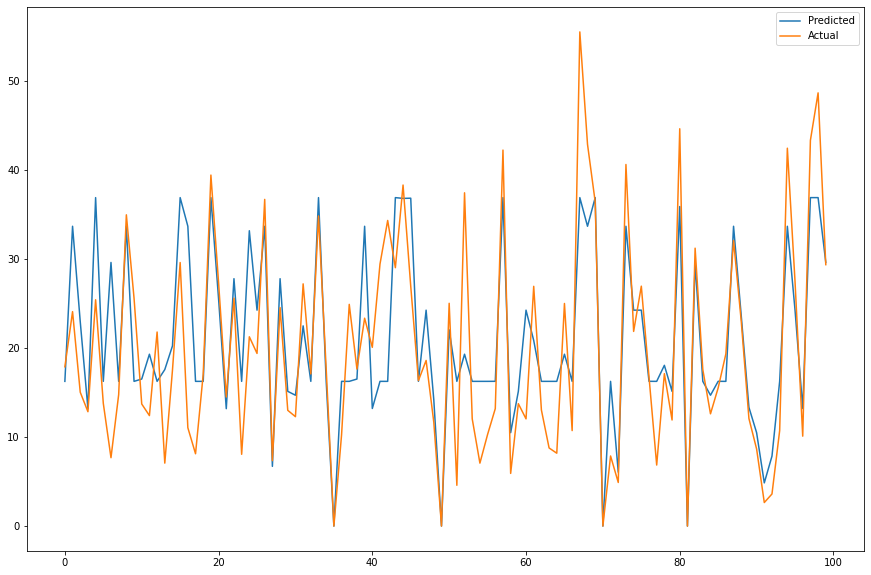

In [103]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d[:100])))
plt.plot(np.array((Y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

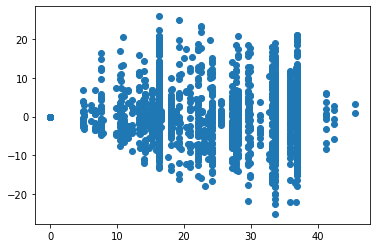

In [104]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(Y_test)-(y_pred_test_d))

# RANDOM FOREST

In [106]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [107]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [108]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,Y_train))

#calculate MSE
MSE_rf= mean_squared_error(Y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(Y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(Y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(Y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )

Model Score: 0.986758521325787
MSE : 2.03906428934202
RMSE : 1.4279580838883261
MAE : 0.9465926619490145
R2 : 0.986758521325787
Adjusted R2 : 0.9864679753418056


Looks like our r2 score value is 0.98 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [109]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [110]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(Y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(Y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((Y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((Y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

MSE : 15.834976698244953
RMSE : 3.9793186223579724
MAE : 2.5756547728843953
R2 : 0.8997573131822403
Adjusted R2 : 0.897557777103606


The r2_score for the test set is 0.90. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [111]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

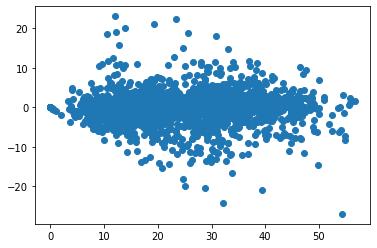

In [112]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(Y_test)-(y_pred_test_r))

In [113]:
rf_model.feature_importances_

array([3.18116050e-01, 1.61399503e-01, 1.32429912e-02, 1.43245155e-02,
       3.50894018e-02, 3.12271820e-02, 1.24855211e-03, 4.62154796e-03,
       1.24874582e-02, 1.94112324e-02, 2.81597857e-02, 2.38620401e-02,
       7.96804253e-03, 3.54840214e-03, 1.27213803e-02, 9.16881260e-04,
       2.35548106e-03, 1.09619740e-03, 2.06043660e-04, 1.88393822e-04,
       3.42653617e-04, 1.35921872e-03, 3.63039853e-03, 1.10223328e-02,
       3.04351711e-02, 1.79030074e-02, 1.25867368e-02, 1.28465279e-02,
       1.02340940e-02, 4.34692877e-03, 5.99996374e-03, 1.34290664e-03,
       1.29683160e-02, 3.04312752e-03, 1.50242994e-01, 1.14288259e-03,
       2.82908350e-03, 1.64465435e-03, 1.87101221e-03, 1.48297021e-03,
       1.34464166e-03, 1.86724346e-03, 1.92569675e-03, 1.78485499e-03,
       3.27525563e-03, 6.37767389e-04, 9.69847782e-03])

In [116]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
4,Solar_Radiation,0.04
5,Rainfall,0.03
10,Hour_4,0.03
24,Hour_18,0.03
9,Hour_3,0.02
11,Hour_5,0.02
25,Hour_19,0.02


In [117]:
#FIT THE MODEL
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [118]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

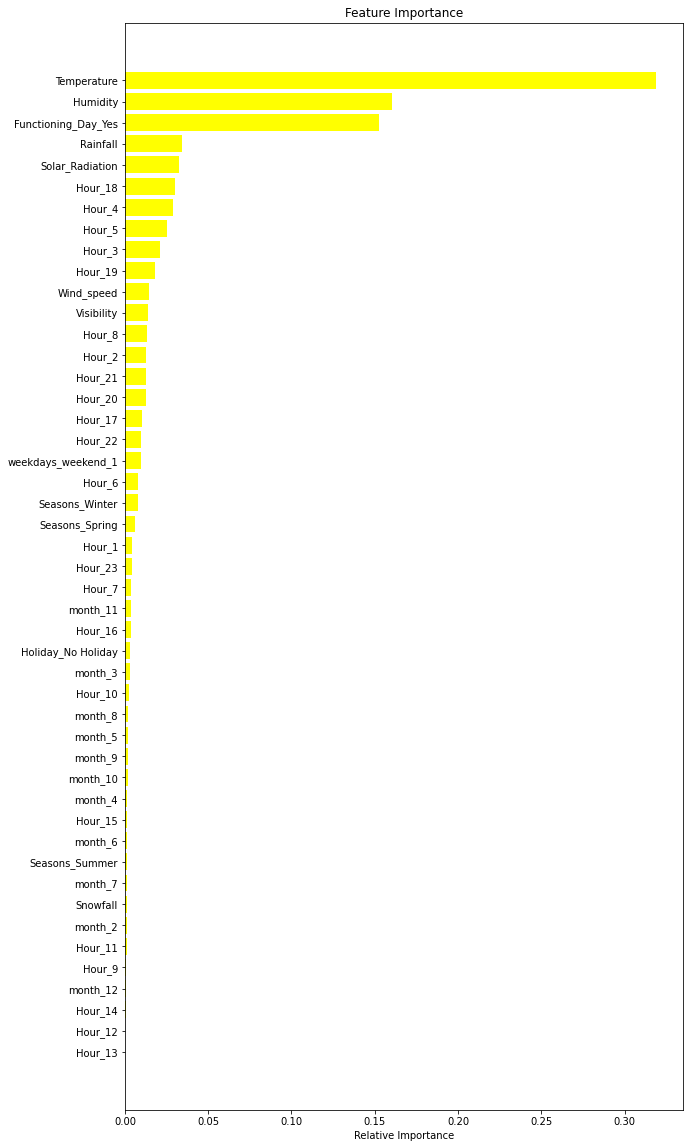

In [120]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')


CONCLUSION: Most important features for Random forest are temperature, humidity, functioning-day-Yes and Rainfall.

# GRADIENT BOOSTING

In [122]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [123]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [124]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,Y_train))
#calculate MSE
MSE_gb= mean_squared_error(Y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(Y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(Y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(Y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gb )

Model Score: 0.8631890085705646
MSE : 21.06761743735691
RMSE : 4.589947432962267
MAE : 3.461168600980916
R2 : 0.8631890085705646
Adjusted R2 : 0.86018708672314


Looks like our r2 score value is 0.86 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [125]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [126]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(Y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(Y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((Y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((Y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_gb  )

MSE : 23.68465090877415
RMSE : 4.866687878709107
MAE : 3.667885373703357
R2 : 0.8500652644661385
Adjusted R2 : 0.8467753799796346


The r2_score for the test set is 0.85. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [127]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

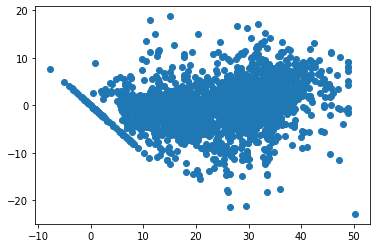

In [128]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(Y_test)-(y_pred_test_g))

In [129]:
gb_model.feature_importances_

array([3.24448515e-01, 1.33661780e-01, 6.79970827e-04, 1.76444636e-03,
       4.72687537e-02, 6.39672948e-02, 0.00000000e+00, 5.78568515e-04,
       6.14669727e-03, 1.47861617e-02, 2.60781782e-02, 2.32069232e-02,
       5.72749042e-03, 0.00000000e+00, 9.20145588e-03, 0.00000000e+00,
       3.12344917e-03, 1.47307456e-03, 0.00000000e+00, 0.00000000e+00,
       1.61947333e-05, 0.00000000e+00, 4.20334059e-04, 7.64621499e-03,
       3.14575142e-02, 1.86870597e-02, 1.18162967e-02, 1.72297075e-02,
       1.37470873e-02, 3.58139269e-04, 2.02036642e-03, 9.99817079e-05,
       4.15506605e-02, 2.44237638e-03, 1.76191998e-01, 0.00000000e+00,
       5.03269126e-04, 0.00000000e+00, 2.99859137e-05, 1.47798967e-03,
       0.00000000e+00, 9.01117141e-05, 0.00000000e+00, 2.01471723e-03,
       2.19314896e-03, 5.55357942e-05, 7.83855099e-03])

In [130]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.head()


,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.13
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.05


In [131]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.18
1,Humidity,0.13
5,Rainfall,0.06
4,Solar_Radiation,0.05
32,Seasons_Winter,0.04
10,Hour_4,0.03
24,Hour_18,0.03
27,Hour_21,0.02
25,Hour_19,0.02


In [132]:
gb_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [133]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

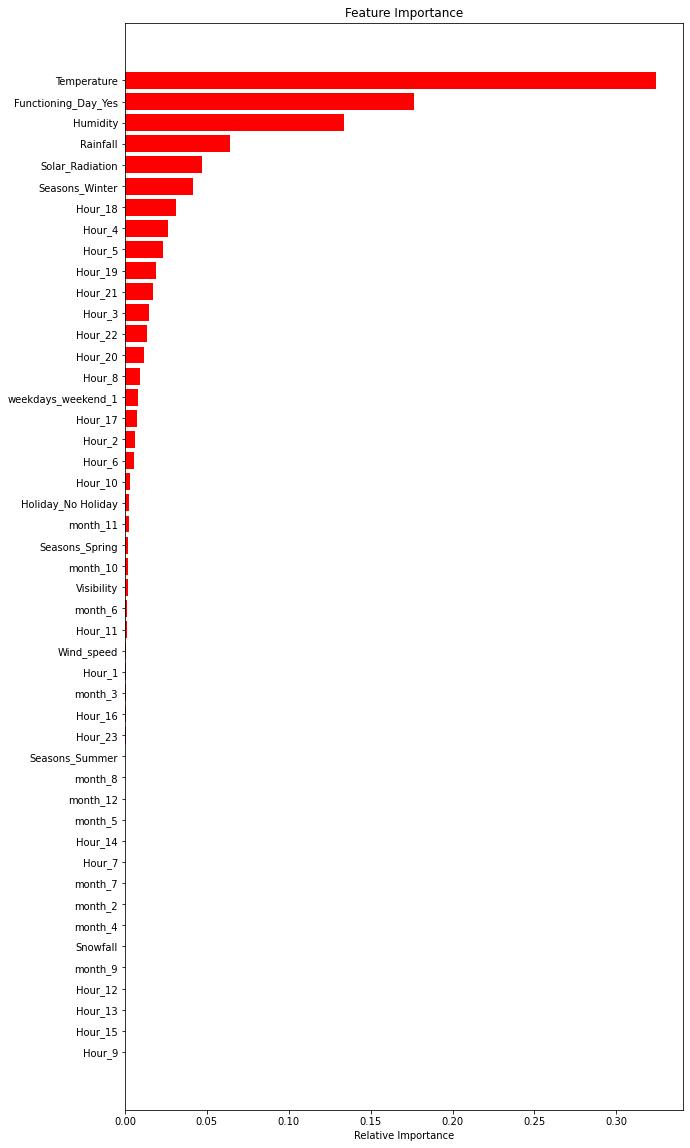

In [134]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')


Most important features for Gradient Boosting are temperature, Functioning-day-Yes,Humidity and Rainfall

# CONCLUSION

In [135]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0             Linear regression   4.658  37.606  6.132     0.756   
             1              Lasso regression   7.255  91.594  9.570     0.405   
             2              Ridge regression   4.658  37.606  6.132     0.756   
             3        Elastic net regression   5.892  59.247  7.697     0.615   
             4      Dicision tree regression   5.223  49.344  7.025     0.680   
             5      Random forest regression   0.947   2.039  1.428     0.987   
             6  Gradient boosting regression   3.461  21.068  4.590     0.863   
Test set     0             Linear regression   4.658  36.645  6.053     0.768   
             1              Lasso regression   7.456  96.775  9.837     0.387   
             2              Ridge regression   4.659  36.647  6.054     0.768   
             3    Elastic net regression Test  6.011  61.651  7.852     0.610   
             4      Dicision tree regression   5.453  52.726  7.261     0.666   
             5      Random forest regression   2.576  15.835  3.979     0.900   
             6  Gradient boosting regression   3.668  23.685  4.867     0.850   

                Adjusted R2  
Training set 0         0.75  
             1         0.39  
             2         0.75  
             3         0.61  
             4         0.67  
             5         0.99  
             6         0.86  
Test set     0         0.76  
             1         0.37  
             2         0.76  
             3         0.60  
             4         0.66  
             5         0.90  
             6         0.85

 No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.